## Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Import Dataset

In [2]:
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.shape

(2000, 5)

In [3]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


## Check null values

In [4]:
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

## Remove columns

In [5]:
df.drop(['originalPrice'], axis=1, inplace=True)

## Manipulate column 'tagText'

In [6]:
df['tagText'].nunique()

100

In [7]:
df['tagText'].value_counts().index

Index(['Free shipping', '+Shipping: $5.09', '+Shipping: $239.64',
       '+Shipping: $97.54', '+Shipping: $64.56', '+Shipping: $75.99',
       '+Shipping: $34.63', '+Shipping: $55.98', '+Shipping: $80.21',
       '+Shipping: $2.91', '+Shipping: $94.92', '+Shipping: $92.22',
       '+Shipping: $66.53', '+Shipping: $744.64', '+Shipping: $350.41',
       '+Shipping: $85.58', '+Shipping: $1,323.31', '+Shipping: $30.86',
       '+Shipping: $12.82', '+Shipping: $21.62', '+Shipping: $140.27',
       '+Shipping: $60.41', '+Shipping: $72.12', '+Shipping: $8.86',
       '+Shipping: $28.9', '+Shipping: $23.29', '+Shipping: $132.48',
       '+Shipping: $44.55', '+Shipping: $255.93', '+Shipping: $142.23',
       '+Shipping: $106.05', '+Shipping: $141.75', '+Shipping: $397.72',
       '+Shipping: $78.61', '+Shipping: $41.93', '+Shipping: $151.69',
       '+Shipping: $134.27', '+Shipping: $67.69', '+Shipping: $54.16',
       '+Shipping: $13.95', '+Shipping: $230.37', '+Shipping: $60.62',
       '+Shi

In [8]:
df['tagText'].value_counts().values

array([1880,    9,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1], dtype=int64)

In [9]:
# Replace all values with 'others' except 'Free shipping' and '+Shipping: $5.09'

df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

In [10]:
list(df['tagText'].value_counts().index)

['Free shipping', 'others', '+Shipping: $5.09']

In [11]:
list(df['tagText'].value_counts().values)

[1880, 111, 9]

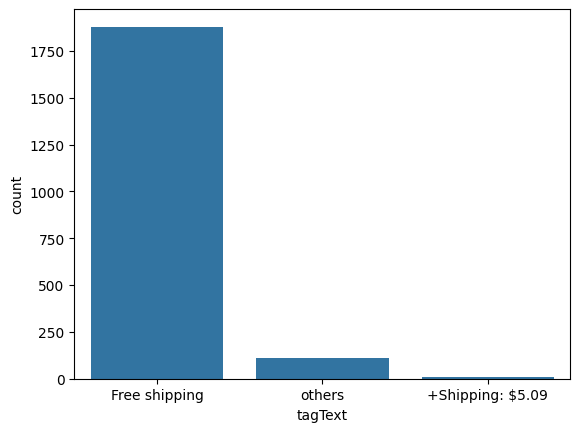

In [12]:
sns.countplot(x='tagText',data=df);

## Manipulate column 'price'

In [13]:
df['price'].nunique()

1802

In [14]:
df['price'].value_counts()

price
$0.99      8
$101.44    5
$58.94     5
$141.05    5
$36.65     4
          ..
$53.33     1
$109.9     1
$31.82     1
$138.71    1
$99.48     1
Name: count, Length: 1802, dtype: int64

In [15]:
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)

In [16]:
df['price'].nunique()

1802

In [17]:
df['price'].value_counts()

price
0.99      8
101.44    5
58.94     5
141.05    5
36.65     4
         ..
53.33     1
109.90    1
31.82     1
138.71    1
99.48     1
Name: count, Length: 1802, dtype: int64

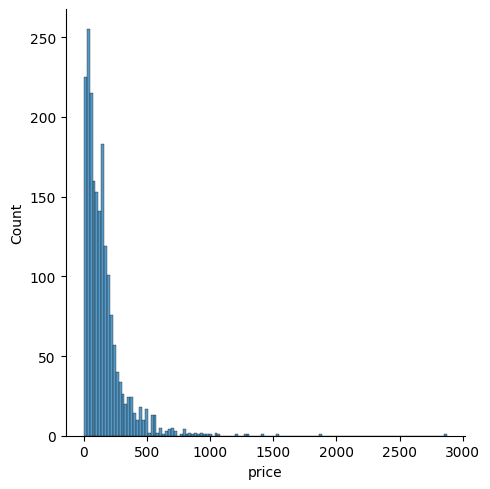

In [18]:
sns.displot(df['price']);

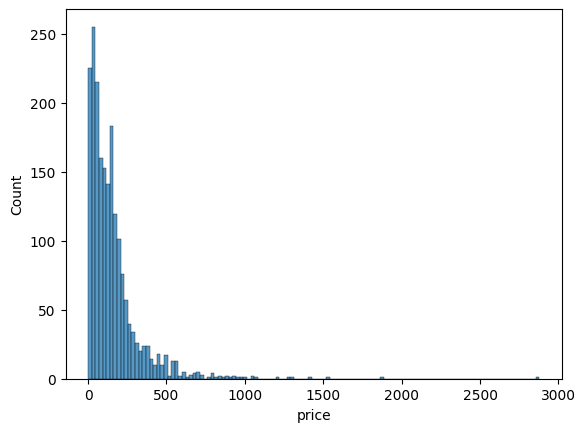

In [19]:
sns.histplot(df['price']);

In [20]:
# pd.option_context('mode.use_inf_as_na', True)

In [21]:
# sns.distplot(df['price']);

## Manipulate column 'sold'

In [22]:
print(list(df['sold'].value_counts().index))

[0, 1, 2, 3, 4, 5, 7, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 19, 28, 20, 18, 24, 27, 17, 26, 25, 22, 31, 23, 30, 41, 38, 37, 35, 34, 29, 42, 60, 33, 43, 32, 49, 900, 57, 40, 47, 48, 600, 39, 53, 68, 63, 3000, 45, 150, 64, 46, 51, 58, 85, 56, 36, 44, 50, 1000, 112, 210, 54, 132, 93, 354, 84, 62, 151, 185, 111, 121, 128, 89, 137, 393, 71, 369, 275, 280, 164, 65, 10000, 197, 288, 115, 700, 332, 135, 392, 256, 147, 52, 79, 171, 77, 118, 55, 95, 87, 223, 182, 81, 405, 134, 110, 251, 2000, 133]


In [23]:
df['sold'].value_counts().values

array([451, 319, 196, 132,  95,  79,  67,  66,  62,  43,  36,  33,  29,
        25,  25,  23,  20,  13,  13,  13,  12,  12,  10,  10,   9,   9,
         8,   8,   8,   8,   8,   7,   5,   5,   5,   5,   4,   4,   4,
         4,   4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int64)

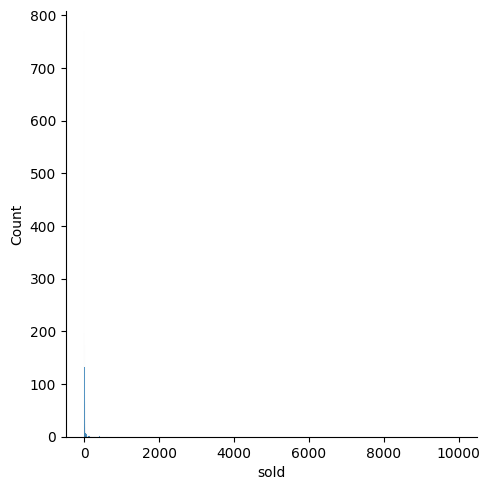

In [24]:
sns.displot(df['sold']);

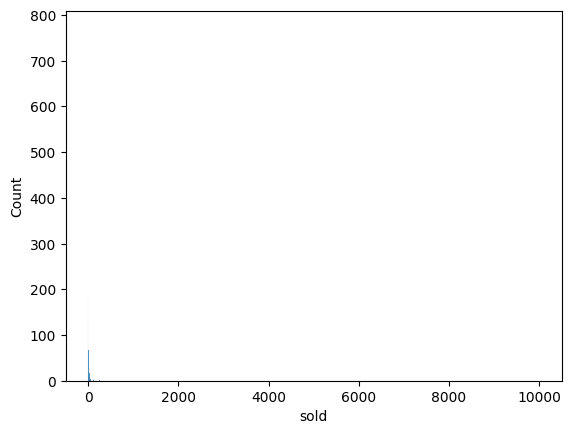

In [25]:
sns.histplot(df['sold']);

C:\Users\RAJEEV\AppData\Local\Temp\ipykernel_2924\3695071933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold']);


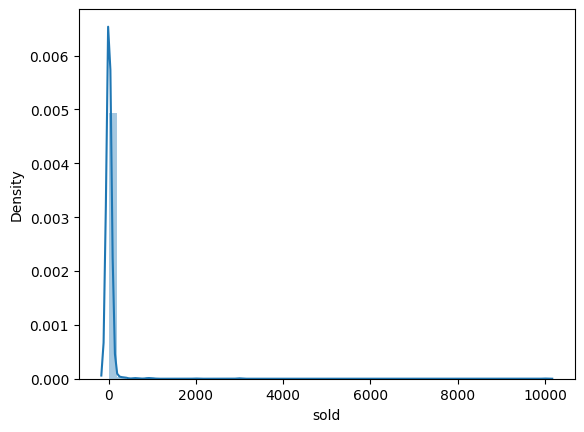

In [26]:
sns.distplot(df['sold']);

## Relationship between 'price' and 'sold' (scatterplot)

In [27]:
df[['price', 'sold']].head()

,price,sold
0,46.79,600
1,169.72,0
2,39.46,7
3,111.99,0
4,21.37,1


<Axes: xlabel='price', ylabel='sold'>

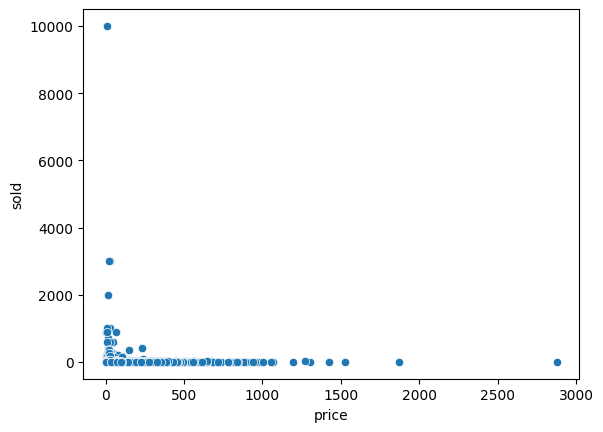

In [28]:
sns.scatterplot(x='price', y='sold', data=df)

## Relationship between 'price' and 'sold' (pairplot)

In [29]:
df['tagText'].unique()

array(['Free shipping', 'others', '+Shipping: $5.09'], dtype=object)

In [30]:
filtered_df = df[df['tagText'] == 'Free shipping']
filtered_df.shape

(1880, 4)

In [31]:
filtered_df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


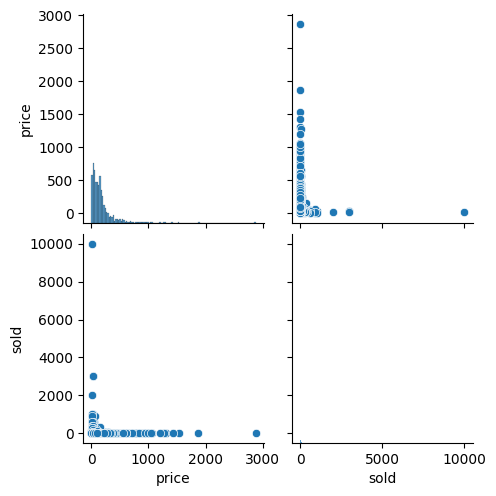

In [33]:
sns.pairplot(filtered_df[['price', 'sold']]);

## LabelEncoder

In [37]:
list(df['tagText'].unique())

['Free shipping', 'others', '+Shipping: $5.09']

In [38]:
df['tagText'].value_counts()

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64

In [39]:
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

In [40]:
list(df['tagText'].unique())

[1, 2, 0]

In [41]:
df['tagText'].value_counts()

tagText
1    1880
2     111
0       9
Name: count, dtype: int64

In [43]:
list(le.classes_)

['+Shipping: $5.09', 'Free shipping', 'others']

In [45]:
list(le.transform(le.classes_))

[0, 1, 2]

In [46]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'+Shipping: $5.09': 0, 'Free shipping': 1, 'others': 2}


In [50]:
mapping_series = pd.Series(le.transform(le.classes_), index=le.classes_)
mapping_series

+Shipping: $5.09    0
Free shipping       1
others              2
dtype: int32

In [49]:
mapping_df = pd.DataFrame({'original_value': le.classes_, 'encoded_value': le.transform(le.classes_)})
mapping_df

,original_value,encoded_value
0,+Shipping: $5.09,0
1,Free shipping,1
2,others,2
